# Hourly heating demand for different climates

## Heating degree days by climate conditions

The amount (in degrees) and for how long (in hours) of thermal heat required to keep the indoor building temperature at a comfortable level will vary depending on different climates. The base temperature selected was set to 17 °C.

The space heating hourly profile for each location is then retrieved with a time dependency according to the heating degree method, known as the "Integration method".

More info on calculation method: https://www.degreedays.net/introduction

In [2]:
import pandas as pd
from pandas import DataFrame
from statistics import *
import matplotlib.pyplot as plt
import numpy as np

df_ST=pd.read_excel("Stuttgart.xls", usecols=["T_amb"],squeeze=True)
df_LO=pd.read_excel("London.xls", usecols=["T_amb"], squeeze=True)
df_MA=pd.read_excel("Madrid.xls", usecols=["T_amb"], squeeze=True)
df_RO=pd.read_excel("Rome.xls", usecols=["T_amb"], squeeze=True)

In [8]:
HDD=pd.DataFrame()

In [12]:
HDD['Stuttgart_temp']=df_ST
HDD['London_temp']=df_LO
HDD['Madrid_temp']=df_MA
HDD['Rome_temp']=df_RO

In [15]:
HDD.head(10)

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp
0,-1.60,4.60,4.10,7.00
1,3.65,7.00,7.25,9.50
2,8.75,9.35,10.45,11.70
3,8.45,9.20,10.40,11.15
4,8.25,9.05,10.25,10.75
5,8.15,8.95,10.15,10.45
6,8.05,8.90,10.05,10.25
7,7.95,8.85,9.95,10.10
8,7.85,8.80,9.85,10.05
9,7.90,8.95,9.80,10.80


In [28]:
def heating_degree_hours(T_amb):
    T_base=17
    if T_amb<T_base:
        HDH=T_base-T_amb
    else:
        HDH=0
    return pd.Series(HDH)

In [29]:
HDD['HDD_Stuttgart']=HDD.apply(lambda fila: heating_degree_hours(fila['Stuttgart_temp']), axis=1)
HDD['HDD_London']=HDD.apply(lambda fila: heating_degree_hours(fila['London_temp']), axis=1)
HDD['HDD_Madrid']=HDD.apply(lambda fila: heating_degree_hours(fila['Madrid_temp']), axis=1)
HDD['HDD_Rome']=HDD.apply(lambda fila: heating_degree_hours(fila['Rome_temp']), axis=1)

In [30]:
HDD.head()

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome
0,-1.60,4.60,4.10,7.00,18.60,12.40,12.90,10.00
1,3.65,7.00,7.25,9.50,13.35,10.00,9.75,7.50
2,8.75,9.35,10.45,11.70,8.25,7.65,6.55,5.30
3,8.45,9.20,10.40,11.15,8.55,7.80,6.60,5.85
4,8.25,9.05,10.25,10.75,8.75,7.95,6.75,6.25


In [46]:
x=sum(HDD['HDD_Stuttgart'])
y=sum(HDD['HDD_London'])
z=sum(HDD['HDD_Madrid'])
w=sum(HDD['HDD_Rome'])

In [36]:
def SH_curve(HDH, tot_degree_hours):
    SH_prob_distr=HDH/tot_degree_hours
    return pd.Series(SH_prob_distr)

In [47]:
HDD['SH_distr_Stuttgart']=HDD.apply(lambda fila: SH_curve(fila['HDD_Stuttgart'], x ),axis=1)
HDD['SH_distr_London']=HDD.apply(lambda fila: SH_curve(fila['HDD_London'], y ),axis=1)
HDD['SH_distr_Madrid']=HDD.apply(lambda fila: SH_curve(fila['HDD_Madrid'], z ),axis=1)
HDD['SH_distr_Rome']=HDD.apply(lambda fila: SH_curve(fila['HDD_Rome'], w ),axis=1)

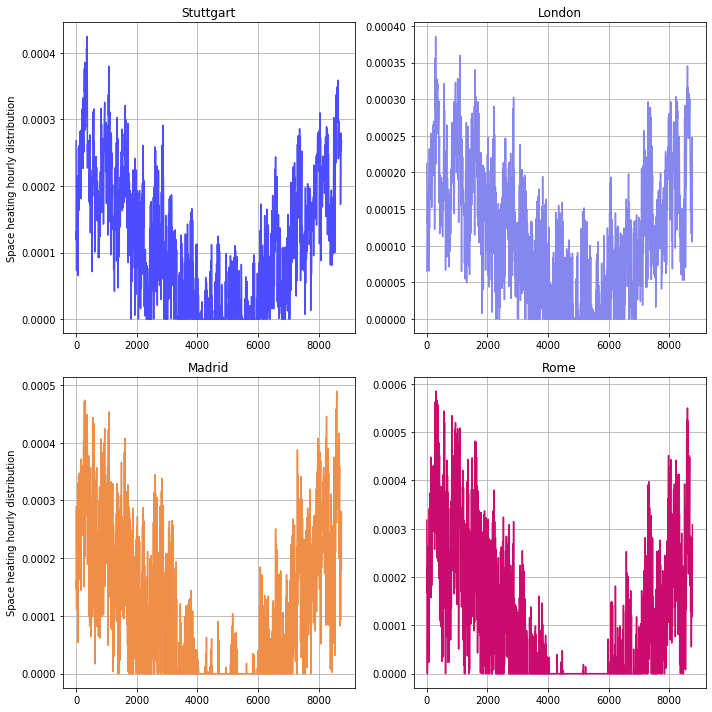

In [56]:
SH_distr_Stuttgart = HDD['SH_distr_Stuttgart']
SH_distr_London = HDD['SH_distr_London']
SH_distr_Madrid = HDD['SH_distr_Madrid']
SH_distr_Rome = HDD['SH_distr_Rome']
# if using a Jupyter notebook, include:
%matplotlib inline

# Data for plotting
t = np.arange(0, 8761, 1)


# Create a figure with 2 rows and 2 cols of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))


# Stuttgart
ax1.plot(t, SH_distr_Stuttgart, color='#4d4dff')
ax1.set_title('Stuttgart')
ax1.set_ylabel('Space heating hourly distribution')
ax1.grid()

# London
ax2.plot(t, SH_distr_London, color='#8686ef')
ax2.set_title('London')
ax2.grid()


# Madrid
ax3.plot(t, SH_distr_Madrid, color='#ef8e49')
ax3.set_title('Madrid')
ax3.set_ylabel('Space heating hourly distribution')
ax3.grid()


# Rome
ax4.plot(t, SH_distr_Rome, color= '#ca0c6e')
ax4.set_title('Rome')
ax4.grid()


fig.tight_layout()
plt.show()

In [64]:
HDD

,Stuttgart_temp,London_temp,Madrid_temp,Rome_temp,HDD_Stuttgart,HDD_London,HDD_Madrid,HDD_Rome,SH_distr_Stuttgart,SH_distr_London,SH_distr_Madrid,SH_distr_Rome
0,-1.60,4.60,4.10,7.00,18.60,12.40,12.90,10.00,0.000268,0.000212,0.000289,0.000318
1,3.65,7.00,7.25,9.50,13.35,10.00,9.75,7.50,0.000193,0.000171,0.000218,0.000238
2,8.75,9.35,10.45,11.70,8.25,7.65,6.55,5.30,0.000119,0.000131,0.000147,0.000168
3,8.45,9.20,10.40,11.15,8.55,7.80,6.60,5.85,0.000123,0.000134,0.000148,0.000186
4,8.25,9.05,10.25,10.75,8.75,7.95,6.75,6.25,0.000126,0.000136,0.000151,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...
8756,-1.45,6.85,7.15,10.15,18.45,10.15,9.85,6.85,0.000266,0.000174,0.000221,0.000218
8757,-1.50,6.35,6.50,9.45,18.50,10.65,10.50,7.55,0.000267,0.000182,0.000235,0.000240
8758,-1.50,5.85,5.90,8.75,18.50,11.15,11.10,8.25,0.000267,0.000191,0.000249,0.000262
8759,-1.55,5.35,5.25,8.00,18.55,11.65,11.75,9.00,0.000268,0.000200,0.000263,0.000286


# Space heating consumption

The user determines the number of buildings (single family housing) supplied by a district heating network. Data from the Inspire project was used to estimate the annual energy consumption for each community in MWh. The single family houses correspond to reference buildings in each climatic zone built between 1945-1970, non-refurbished, with an average built area of 100 m2.

The SFH model has a fixed geometry for all the climates and periods of construction. It has been defined following the common characteristics for a European SFH. The building model is composed of two storeys with a total of 100 m² of living area (Inspire project, D2.1c(2014))

In [107]:
# Units in [kWh/m²y] 
SH_DHW = {
 'SFH_ST': {"SH": 68.9, "DHW": 21.7, '%DHW':0.2395},
 'SFH_LO': {"SH": 74.8, "DHW": 21.8, '%DHW':0.2257},
 'SFH_MA': {"SH": 85.6, "DHW": 21.8, '%DHW':0.2030},
 'SFH_RO': {"SH": 75.9, "DHW": 21.7, '%DHW':0.2223}
}

In [108]:
SFH=pd.DataFrame(SH_DHW)
SFH

,SFH_ST,SFH_LO,SFH_MA,SFH_RO
SH,68.9000,74.8000,85.600,75.9000
DHW,21.7000,21.8000,21.800,21.7000
%DHW,0.2395,0.2257,0.203,0.2223


In [84]:
n_buildings =float(input("""Enter number of SFH buildings: 
#"""))

Enter number of SFH buildings: 
# 10


In [111]:
SFH['SFH_ST'].iloc[0]

68.9

In [115]:
Stuttgart_SH=n_buildings*100*68.9
London_SH=n_buildings*100*74.8
Madrid_SH=n_buildings*100*85.6
Rome_SH=n_buildings*100*75.9

x= pd.Series([Stuttgart_SH, London_SH, Madrid_SH, Rome_SH], index= ['Stuttgart_SH','London_SH','Madrid_SH','Rome_SH'])


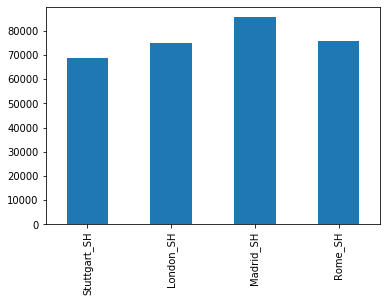

In [119]:
x.plot(kind='bar')

In [121]:
x[0]

68900.0

In [122]:
def get_SH_SFH_community(HD_total, SH_profile):
   
    return HD_total * SH_profile

In [123]:
SH_Stuttgart = HDD.apply(lambda fila: get_SH_SFH_community(x[0], fila['SH_distr_Stuttgart']), axis=1)

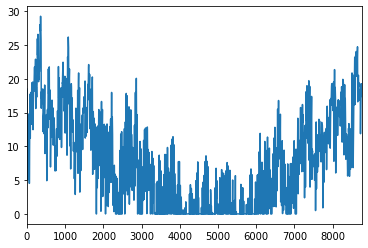

In [125]:
SH_Stuttgart.plot()

In [126]:
sum(SH_Stuttgart)

68900.00000000077